# Exercise - Polynomial(Non linear) Regression with semiconductor device I/V plot

The dataset is a plot of current variation of a device based on the voltage applied. The output is non linear in nature. We have to predict current based on voltage with non linear regression. 

### Perform the following operations:

1. Plot the voltage vs current. What degree of polynomial do you think is this?
2. Split the data into training & testing. It should be a 70:30 split with random_state 2. Obtain polynomial features for training and testing dataset with degree 2. 
3. Perform linear regression on the transformed training dataset. Plot the polynomial curve obtained along with training data set. Does it properly fit or overfit?
4. Predict the output for test dataset, and plot a scatter of test output vs obtained output. Obtain MSE and R^2 score. 

### Vary the degree from 2 to 10. For which values of degree does the data start to overfit? Plot the training dataset and obtained curve for each degree and justify.


In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./data/data.csv')
(df.head())

,voltage,current
0,-1.25,-3.164730
1,-1.20,-2.346773
2,-1.15,-1.305936
3,-1.10,-1.891162
4,-1.05,-1.040983


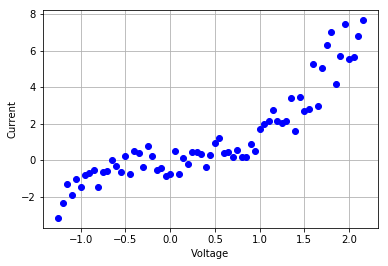

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['voltage'],df['current'],'bo')
plt.xlabel("Voltage")
plt.ylabel("Current")
plt.grid(True)

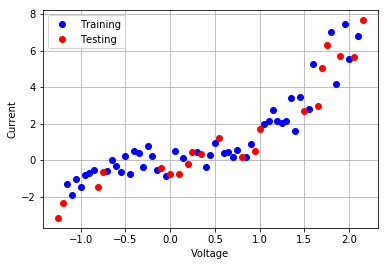

In [4]:
volt_train,volt_test,curr_train,curr_test=train_test_split(df['voltage'],df["current"],test_size=0.3,random_state=2)
plt.figure()
plt.plot(volt_train,curr_train,'bo',label='Training')
plt.plot(volt_test,curr_test,'ro',label='Testing')
plt.legend()
plt.xlabel("Voltage")
plt.ylabel("Current")
plt.grid(True)

In [5]:
import numpy as np

poly=PolynomialFeatures(degree=4)

QuadraticCoeff=poly.fit_transform(df['voltage'].values.reshape(-1,1))
QuadraticCoeff

array([[ 1.00000000e+00, -1.25000000e+00,  1.56250000e+00,
        -1.95312500e+00,  2.44140625e+00],
       [ 1.00000000e+00, -1.20000000e+00,  1.44000000e+00,
        -1.72800000e+00,  2.07360000e+00],
       [ 1.00000000e+00, -1.15000000e+00,  1.32250000e+00,
        -1.52087500e+00,  1.74900625e+00],
       [ 1.00000000e+00, -1.10000000e+00,  1.21000000e+00,
        -1.33100000e+00,  1.46410000e+00],
       [ 1.00000000e+00, -1.05000000e+00,  1.10250000e+00,
        -1.15762500e+00,  1.21550625e+00],
       [ 1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -9.50000000e-01,  9.02500000e-01,
        -8.57375000e-01,  8.14506250e-01],
       [ 1.00000000e+00, -9.00000000e-01,  8.10000000e-01,
        -7.29000000e-01,  6.56100000e-01],
       [ 1.00000000e+00, -8.50000000e-01,  7.22500000e-01,
        -6.14125000e-01,  5.22006250e-01],
       [ 1.00000000e+00, -8.00000000e-01,  6.40000000e-01,
        -5.12000000e-01

In [6]:
lm=LinearRegression()
lm.fit(QuadraticCoeff,df['current'])
print("Expected Output\n",df['current'])
print("Predicted Output\n",lm.predict(QuadraticCoeff))

Expected Output
 0    -3.164730
1    -2.346773
2    -1.305936
3    -1.891162
4    -1.040983
5    -1.468562
6    -0.836266
7    -0.706068
8    -0.565333
9    -1.488503
10   -0.671475
11   -0.581898
12    0.034008
13   -0.345264
14   -0.624779
15    0.210057
16   -0.750032
17    0.511143
18    0.374613
19   -0.387191
20    0.772276
21    0.212614
22   -0.538719
23   -0.456034
24   -0.855777
25   -0.770901
26    0.495114
27   -0.741300
28    0.134684
29   -0.223752
        ...   
39    0.174277
40    0.553204
41    0.162978
42    0.167203
43    0.881266
44    0.513323
45    1.728250
46    2.000633
47    2.150938
48    2.740402
49    2.125739
50    2.024269
51    2.150837
52    3.407732
53    1.619470
54    3.484172
55    2.695660
56    2.779708
57    5.266017
58    2.989576
59    5.056036
60    6.311777
61    7.011223
62    4.188893
63    5.723609
64    7.454595
65    5.514608
66    5.669420
67    6.826437
68    7.663116
Name: current, Length: 69, dtype: float64
Predicted Output
 [-2.6659

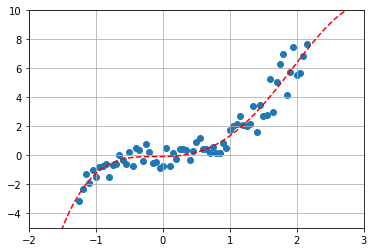

In [7]:
import numpy as np
xx=np.linspace(-2,3,100).reshape(-1,1)
xx_quadratic=poly.fit_transform(xx)

plt.axis([-2,3,-5,10])
plt.grid()
plt.plot(xx,lm.predict(xx_quadratic),c='r',linestyle='--')
plt.scatter(df['voltage'],df['current'])
plt.show()

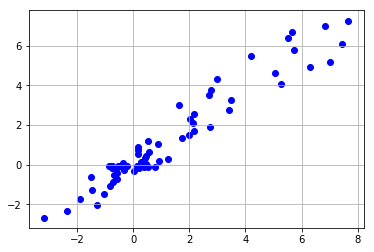

In [8]:
plt.scatter(df['current'], lm.predict(QuadraticCoeff), c='b',)
plt.grid()
plt.axis()
plt.show()

In [11]:
lm.score(QuadraticCoeff,df['current'])

0.9299753978974236

In [9]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(df['current'],lm.predict(QuadraticCoeff),multioutput='uniform_average')
print("SGD MSE ->",mse)

SGD MSE -> 0.43592474769493367


In [10]:
from sklearn.metrics import r2_score
r2=r2_score(df['current'],lm.predict(QuadraticCoeff))
print(r2)

0.9299753978974236


After degree 3 or 4, the graph starts to overfit